 LABORATORIO 02

Aplicando un modelo de regresión logistica(clasificación) para predecir la probabilidad de abandono de un cliente del servicio bancario.
  

El dataset cuenta con los siguientes datos:
- Apellido: Etiqueta de apellidos codificados
- Surname_tfidf_0-4: Funciones creadas aplicando TFIDF Vectorizer a los apellidos
- Puntuación crediticia: Un valor numérico que representa la puntuación crediticia del cliente
- Geografía: El país donde reside el cliente (Francia, España o Alemania)
- Género: El sexo del cliente (Masculino o Femenino)
- Edad: La edad del cliente.
- Tenencia: el número de años que el cliente ha estado en el banco
- Saldo: el saldo de la cuenta del cliente
- NumOfProducts: el número de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito)
- HasCrCard: si el cliente tiene un crédito tarjeta (1 = sí, 0 = no)
- IsActiveMember: si el cliente es un miembro activo (1 = sí, 0 = no)
- Salarioestimado: el salario estimado del cliente
- Alemania, Francia, España: una característica de geografía codificada en caliente
- Masculino, femenino: una característica de género codificada en caliente
- Mem_no_Products: NumOfProducts * IsActiveMember
- Cred_Bal_Sal: (Puntuación de crédito * Saldo) / Salario estimado
- Bal_sal: Saldo / Salario estimado
- Tenure_Age: Tenure / Edad
- Age_Tenure_product: Edad * Tenure

Y la salida:
- Salida: si el cliente ha abandonado (1 = sí , 0 = no)

In [88]:
#Acceso a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [90]:
# Cargar datos
data = np.loadtxt('/content/drive/MyDrive/420/dataset labs/lab02/datasetBank.csv', delimiter=',')

X_train, y_train = data[:140022, 0:24], data[:140022, 24]
X_test, y_test = data[140022:, 0:24], data[140022:, 24]
X = X_train
y = y_train
print(X)
print(y)

[[2.02300000e+03 6.68000000e+02 3.30000000e+01 ... 0.00000000e+00
  9.09090909e-02 9.90000000e+01]
 [2.02400000e+03 6.27000000e+02 3.30000000e+01 ... 0.00000000e+00
  3.03030303e-02 3.30000000e+01]
 [1.23600000e+03 6.78000000e+02 4.00000000e+01 ... 0.00000000e+00
  2.50000000e-01 4.00000000e+02]
 ...
 [2.06200000e+03 6.19000000e+02 3.40000000e+01 ... 0.00000000e+00
  8.82352941e-02 1.02000000e+02]
 [7.01000000e+02 5.83000000e+02 5.80000000e+01 ... 2.46233414e+00
  1.20689655e-01 4.06000000e+02]
 [1.00100000e+03 7.06000000e+02 5.30000000e+01 ... 0.00000000e+00
  1.50943396e-01 4.24000000e+02]]
[0. 0. 0. ... 0. 1. 1.]


In [91]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [92]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
#z=0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [93]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [94]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [95]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [96]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [97]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.77425105e+00 -1.44280037e-03 -6.04654652e-02  7.42228713e-01
  9.88988547e-03 -1.30677752e-01 -4.53328113e-01 -7.07636425e-02
 -4.34494371e-01  4.78169155e-02 -1.78136348e-02 -5.87213336e-04
 -1.45005912e-02 -4.75008286e-02 -1.75131799e-02 -1.67374594e-01
  3.33554691e-01 -1.27741139e-01  1.68129095e-01 -1.68129095e-01
 -2.46812653e-01 -4.02467903e-03 -2.82672878e-03 -1.85705404e-01
  1.01477271e-01]


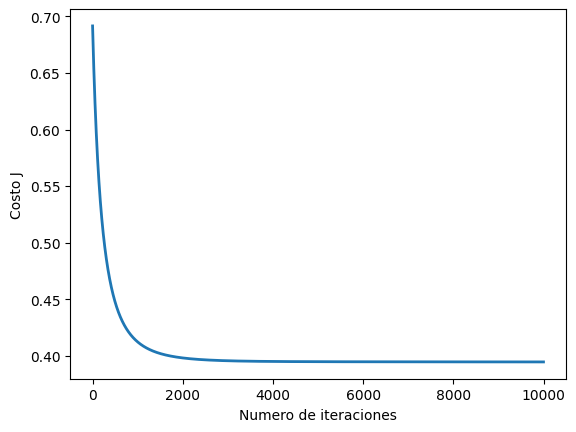

In [98]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [99]:
#muestra las columnas de X especificamente solo para el test
print(X_test)

[[2.15000000e+02 6.82000000e+02 5.70000000e+01 ... 0.00000000e+00
  1.75438596e-02 5.70000000e+01]
 [4.74000000e+02 6.62000000e+02 3.50000000e+01 ... 0.00000000e+00
  2.57142857e-01 3.15000000e+02]
 [2.65300000e+03 6.82000000e+02 2.90000000e+01 ... 0.00000000e+00
  2.06896552e-01 1.74000000e+02]
 ...
 [1.99900000e+03 7.71000000e+02 3.90000000e+01 ... 0.00000000e+00
  1.28205128e-01 1.95000000e+02]
 [1.33600000e+03 5.16000000e+02 3.50000000e+01 ... 5.64107569e-01
  2.85714286e-01 3.50000000e+02]
 [1.57000000e+03 7.09000000e+02 3.60000000e+01 ... 0.00000000e+00
  1.94444444e-01 2.52000000e+02]]


In [100]:
#muestra el valor de theta
print(theta)

[-1.77425105e+00 -1.44280037e-03 -6.04654652e-02  7.42228713e-01
  9.88988547e-03 -1.30677752e-01 -4.53328113e-01 -7.07636425e-02
 -4.34494371e-01  4.78169155e-02 -1.78136348e-02 -5.87213336e-04
 -1.45005912e-02 -4.75008286e-02 -1.75131799e-02 -1.67374594e-01
  3.33554691e-01 -1.27741139e-01  1.68129095e-01 -1.68129095e-01
 -2.46812653e-01 -4.02467903e-03 -2.82672878e-03 -1.85705404e-01
  1.01477271e-01]


In [101]:
# Normalizar el conjunto de características de prueba y obtener la media (mu) y la desviación estándar (sigma)
X_test_norm, mu, sigma = featureNormalize(X_test)

# Obtener las dimensiones de la matriz de características normalizadas
m, n = X_test_norm.shape

# Agregar una columna de unos al inicio de la matriz de características normalizadas
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

# Calcular la salida del modelo (probabilidad de si el cliente abandona o no el servicio) para el conjunto de prueba normalizado
abandona= sigmoid(np.dot(X_test_norm, theta))

# Imprimir las probabilidades de abandono calculadas para cada instancia en el conjunto de prueba
print(abandona)


[0.13114694 0.02031236 0.02042286 ... 0.12335671 0.06086205 0.14314709]


In [102]:
#visualizar la prediccion y la "y" correspondiente al mismo
predict = sigmoid(np.dot(X_test_norm[1], theta))   # Se debe cambiar esto
print(predict)
print(y_test[1])

0.0203123641915192
0.0
